# Exponential Moving Average Crossover Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date, timedelta
from sharpe import gen_sharpe
from fin_table_obj import Table
from ema_cross_obj import ExpMovingAverageTable

Downloading Data:

In [2]:
# YYYY-MM-DD
start = "2014-04-25"

# for current day: str(date.today() - timedelta(1))
end = str(date.today() - timedelta(1))

# moving Averages, MA1 is always smaller than MA2
ma1 = "50"
ma2 = "250"

# model trading days input for crossover visualization in days. standard 1Y is 252 days. Can use multiples of 252 to track years
model_days = 252 * 1

#multi_level_index = False | removes ticker noise in table
QQQ = (yf.download("QQQ", start, end, multi_level_index = False))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Complete Table Creation

In [3]:
QQQ_table = Table(QQQ)
QQQ_table.gen_table()

,Day Count,Open,High,Low,Close,Return,Cumulative Return,Volatility
Date,,,,,,,,
2014-04-25,1,79.755,79.847,78.757,78.949,NaN,NaN,NaN
2014-04-28,2,79.325,79.792,77.960,79.206,0.324,0.325,NaN
2014-04-29,3,79.444,79.984,79.059,79.838,0.795,1.125,NaN
2014-04-30,4,79.471,80.131,79.270,80.048,0.264,1.392,NaN
2014-05-01,5,80.176,80.744,79.975,80.286,0.297,1.694,NaN
2014-05-02,6,80.561,80.708,79.947,80.140,-0.183,1.508,NaN
2014-05-05,7,79.664,80.580,79.471,80.561,0.524,2.042,NaN
2014-05-06,8,80.433,80.479,79.480,79.517,-1.305,0.719,NaN
2014-05-07,9,79.682,79.764,78.344,79.288,-0.288,0.429,NaN


In [4]:
QQQ_ema_table = ExpMovingAverageTable(QQQ, ma1, ma2)
QQQ_ema_table.gen_table()

,Day Count,Open,High,Low,Close,50-day EMA,250-day EMA,Return,Cumulative Return,Model Return,Cumulative Model Return,Signal,Entry
Date,,,,,,,,,,,,,
2015-04-23,251,100.288,101.464,100.269,101.010,98.468,91.595,NaN,NaN,0.377,0.378,1,1.0
2015-04-24,252,102.075,102.520,101.909,102.381,98.567,91.670,1.348,1.357,1.348,1.740,1,0.0
2015-04-27,253,102.761,102.955,101.899,102.122,98.717,91.756,-0.253,1.101,-0.254,1.482,1,0.0
2015-04-28,254,102.196,102.390,101.057,101.918,98.851,91.838,-0.200,0.899,-0.200,1.279,1,0.0
2015-04-29,255,101.353,101.946,100.723,101.279,98.971,91.919,-0.629,0.266,-0.629,0.644,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-21,2764,438.230,439.080,427.930,433.110,477.604,475.770,-2.506,328.779,-2.506,110.238,1,0.0
2025-04-22,2765,438.820,447.580,437.620,444.480,475.859,475.431,2.591,340.036,2.591,115.756,1,0.0
2025-04-23,2766,458.170,463.380,452.880,454.560,474.628,475.184,2.242,350.015,-2.242,110.973,-1,-2.0


# MA Cross-Over Grid Visualization

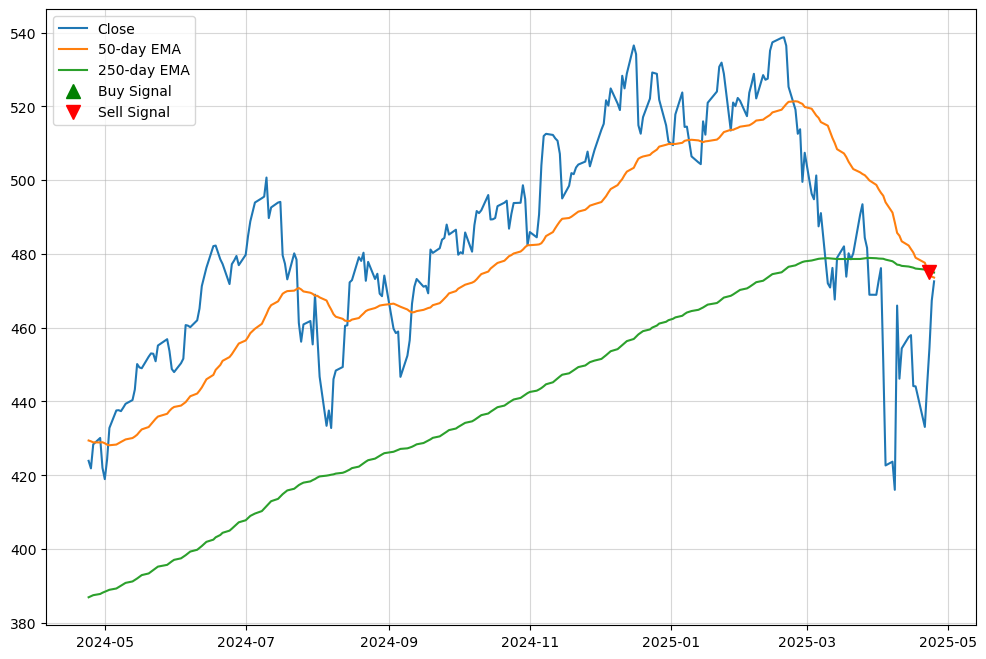

In [5]:
QQQ_ema_table.gen_ema_cross_visual(model_days)

# Buy/Hold to SMA Returns Comparison

Cumulative Buy/Hold Return: 367.84
Cumulative Model Return: 102.94


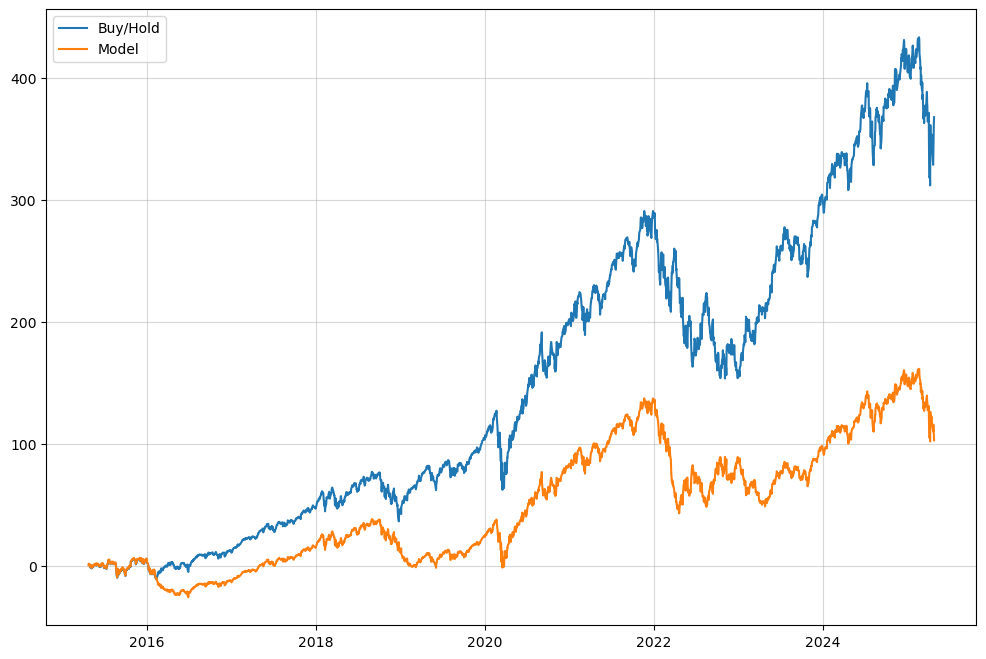

In [6]:
QQQ_ema_table.gen_buyhold_comp()

# Sharpe Ratio:

In [7]:
print('Buy/Hold Sharpe Ratio:', round(gen_sharpe(QQQ_ema_table.gen_table()['Return']), 2))
print('Model Sharpe Ratio:', round(gen_sharpe(QQQ_ema_table.gen_table()['Model Return']), 2))

Buy/Hold Sharpe Ratio: 0.74
Model Sharpe Ratio: 0.36


# Volatility

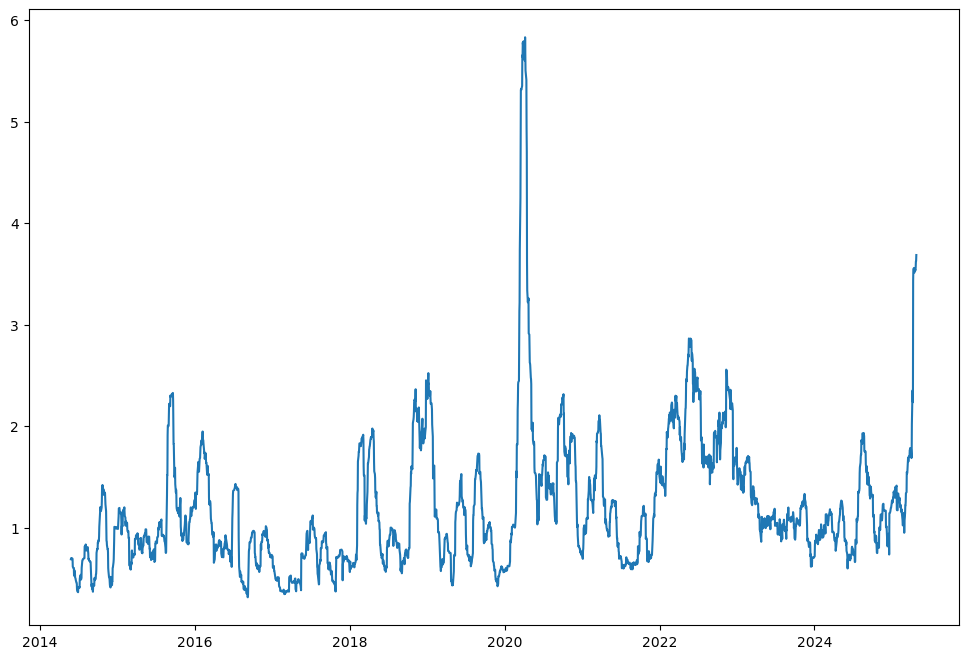

In [8]:
plt.plot(QQQ.Volatility);